**Loading and Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# for display settings
pd.set_option('display.max_columns', None)

# Load the dataset
data1 = pd.read_csv('/content/Total.csv')

/tmp/ipython-input-2-1704208035.py:5: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/content/Total.csv')


In [ ]:
data1.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


**Data Cleaning**

In [ ]:
# Check for the missing values
print(data1.isnull().sum())

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64


In [ ]:
# Dropping rows with missing values in key columns ( if necessary )
data1.dropna(subset=['BasePay', 'TotalPayBenefits'])

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.0,0.0,0.0,0.0,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0.0,0.0,0.0,0.0,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.0,0.0,0.0,0.0,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0.0,0.0,0.0,0.0,0.00,0.00,2018


**Convert Data Types**

In [ ]:
# Converting columns to appropriate data types if needed
# data1['Year'] = data1['Year'].asType(int)

In [ ]:
# Verifying data types
print(data1.dtypes)

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object


**3. Handling Negative or Zero Pay values:**

In [ ]:
# Filter out rows where TotalPay or TotalPayBenefits are 0 or negative)
data1 = data1[(data1['TotalPay']>0) & (data1['TotalPayBenefits']>0)]

# Check updated dataset
data1.describe()

,TotalPay,TotalPayBenefits,Year
count,312173.000000,312173.000000,312173.000000
mean,78981.625208,101141.490339,2014.625246
std,53158.372642,66409.363813,2.291859
min,0.010000,0.010000,2011.000000
25%,39340.140000,49563.520000,2013.000000
50%,75031.820000,100172.370000,2015.000000
75%,111519.740000,142506.390000,2017.000000
max,592394.340000,712802.360000,2018.000000


**Exploratory Data Analysis**

In [ ]:
# Descriptive Statistics
data1.describe()

,TotalPay,TotalPayBenefits,Year
count,312173.000000,312173.000000,312173.000000
mean,78981.625208,101141.490339,2014.625246
std,53158.372642,66409.363813,2.291859
min,0.010000,0.010000,2011.000000
25%,39340.140000,49563.520000,2013.000000
50%,75031.820000,100172.370000,2015.000000
75%,111519.740000,142506.390000,2017.000000
max,592394.340000,712802.360000,2018.000000


In [ ]:
# Top 10 Highest Paying Job Titles
# Group by job title and get the mean TotalPay
job_salary = data1.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)

/tmp/ipython-input-11-1012330404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.values, y=job_salary.index, palette='viridis')


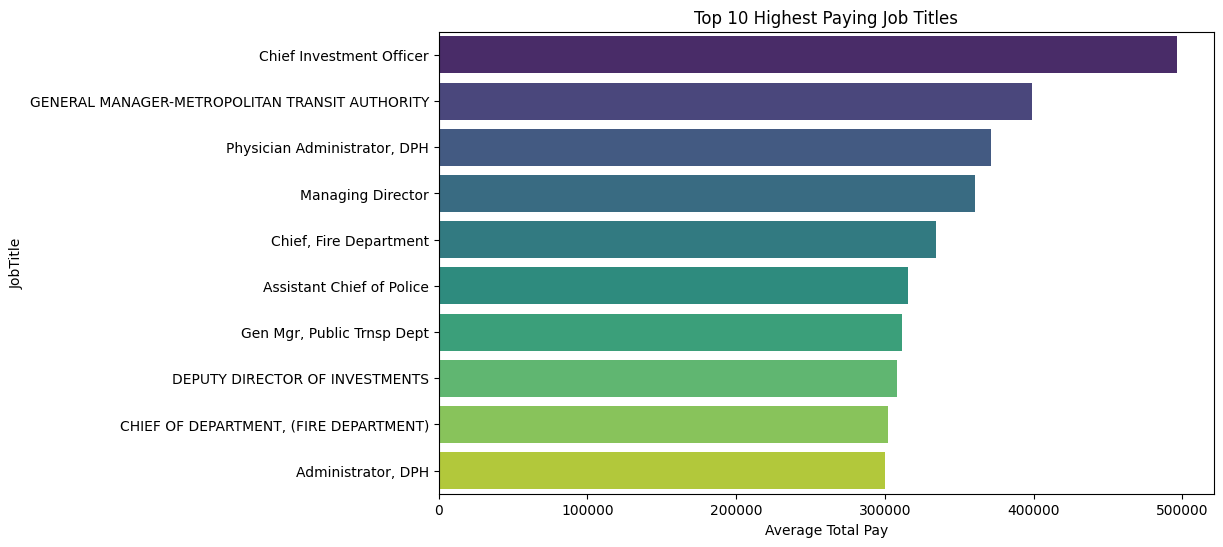

In [ ]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=job_salary.values, y=job_salary.index, palette='viridis')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()

In [ ]:
# Distribution of BasePay, OvertimePay, and OtherPay
# Plot histograms for BasePay, OvertimePay, and OtherPay
# Replace 'Not Provided' with NaN, then convert to numeric
data1['BasePay'] = pd.to_numeric(data1['BasePay'].replace('Not Provided', np.nan), errors='coerce')
data1['OvertimePay'] = pd.to_numeric(data1['OvertimePay'].replace('Not Provided', np.nan), errors='coerce')
data1['OtherPay'] = pd.to_numeric(data1['OtherPay'].replace('Not Provided', np.nan), errors='coerce')
data1['Benefits'] = pd.to_numeric(data1['Benefits'].replace('Not Provided', np.nan), errors='coerce')


In [ ]:
data1.dropna(subset=['BasePay', 'TotalPayBenefits'], inplace=True)


Text(0.5, 1.0, 'Distribution of BasePay')

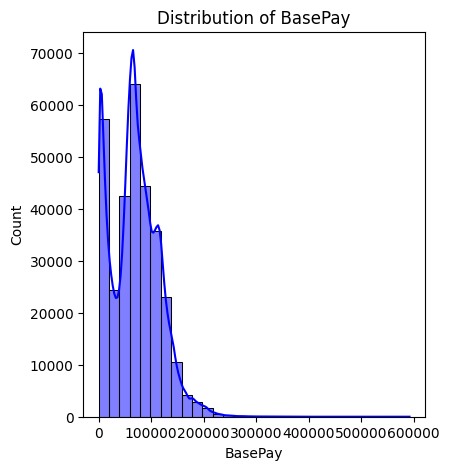

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data1['BasePay'], bins=30, kde=True, color='blue')
plt.title('Distribution of BasePay')



In [ ]:
for col in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
    data1[col] = pd.to_numeric(data1[col].replace('Not Provided', np.nan), errors='coerce')


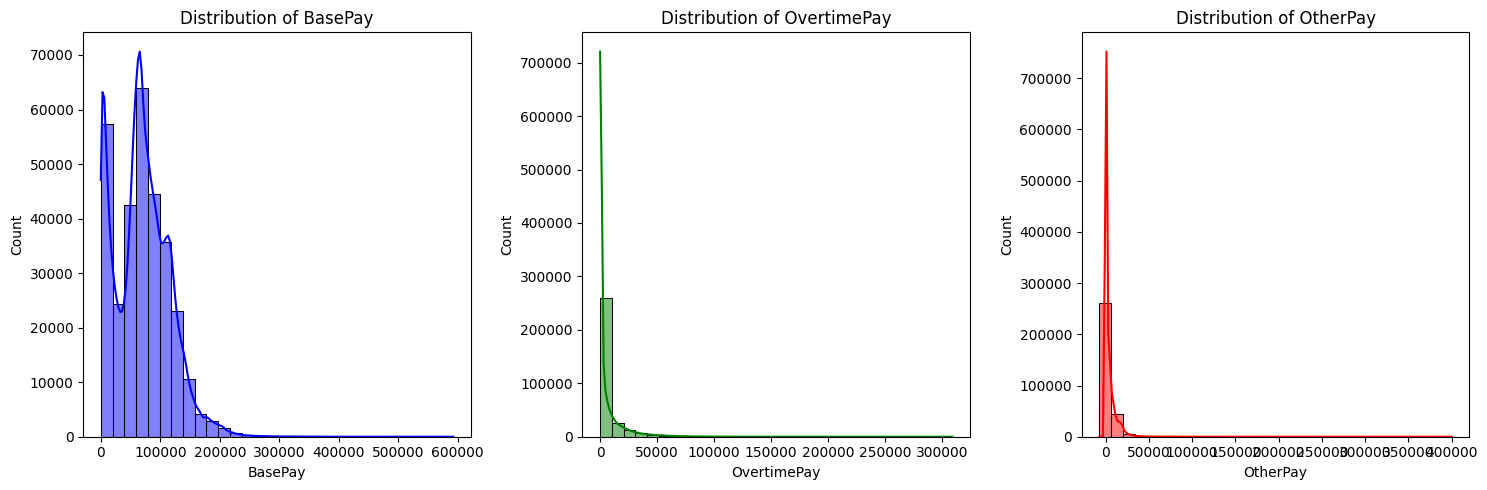

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data1['BasePay'], bins=30, kde=True, color='blue')
plt.title('Distribution of BasePay')

plt.subplot(1, 3, 2)
sns.histplot(data1['OvertimePay'], bins=30, kde=True, color='green')
plt.title('Distribution of OvertimePay')

plt.subplot(1, 3, 3)
sns.histplot(data1['OtherPay'], bins=30, kde=True, color='red')
plt.title('Distribution of OtherPay')

plt.tight_layout()  # Correct function to fix layout
plt.show()


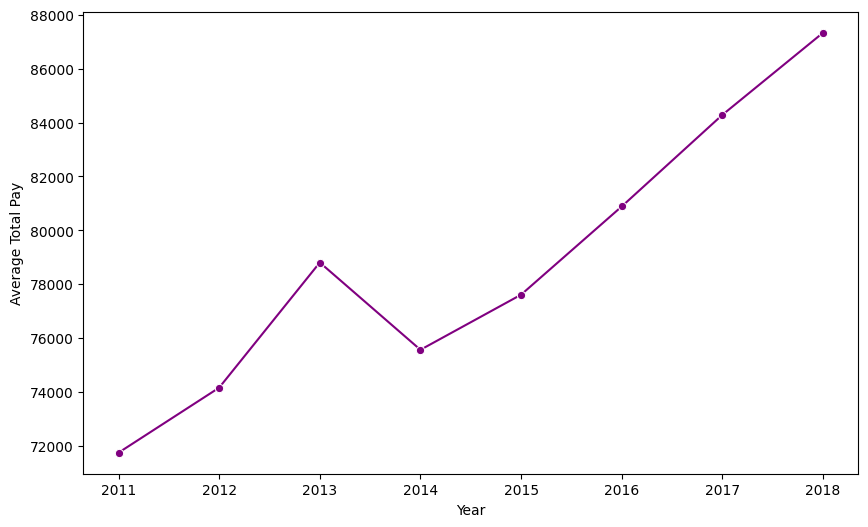

In [ ]:
# Pay Over the Years
# Group by Year and calculate mean total pay
pay_over_years = data1.groupby('Year')['TotalPay'].mean()

#plot
plt.figure(figsize=(10,6))
sns.lineplot(x=pay_over_years.index, y=pay_over_years.values, marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.show()

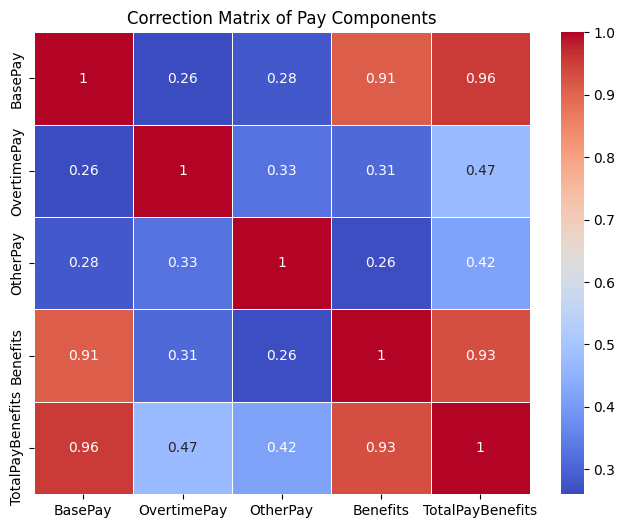

In [ ]:
# Correlation Map
plt.figure(figsize=(8,6))
corr_matrix = data1[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits']].corr()

#Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correction Matrix of Pay Components')
plt.show()


**Salary Prediction with Machine Learning**

In [ ]:
# 1. Handling Categorical Vraibles
# Encoding JobTitle using one-hot encoding
data1 = pd.get_dummies(data1, columns=['JobTitle'], drop_first=True)

# Display new dataframe
data1.head()

EmployeeName    BasePay  OvertimePay   OtherPay  Benefits   TotalPay  \
0     NATHANIEL FORD  167411.18         0.00  400184.25       NaN  567595.43   
1       GARY JIMENEZ  155966.02    245131.88  137811.38       NaN  538909.28   
2     ALBERT PARDINI  212739.13    106088.18   16452.60       NaN  335279.91   
3  CHRISTOPHER CHONG   77916.00     56120.71  198306.90       NaN  332343.61   
4    PATRICK GARDNER  134401.60      9737.00  182234.59       NaN  326373.19   

   TotalPayBenefits  Year  JobTitle_ACCOUNTANT  JobTitle_ACCOUNTANT INTERN  \
0         567595.43  2011                False                       False   
1         538909.28  2011                False                       False   
2         335279.91  2011                False                       False   
3         332343.61  2011                False                       False   
4         326373.19  2011                False                       False   

   JobTitle_ACPO,JuvP, Juv Prob (SFERS)  JobTitle_ACUPUNCTURIST  \
0                                 False                   False   
1                                 False                   False   
2                                 False                   False   
3                                 False                   False   
4                                 False                   False   

   JobTitle_ADMINISTRATIVE ANALYST  JobTitle_ADMINISTRATIVE ANALYST II  \
0                            False                               False   
1                            False                               False   
2                            False                               False   
3                            False                               False   
4                            False                               False   

   JobTitle_ADMINISTRATIVE ANALYST III  JobTitle_ADMINISTRATIVE ENGINEER  \
0                                False                             False   
1                                False                             False   
2                                False                             False   
3                                False                             False   
4                                False                             False   

   JobTitle_ADMINISTRATIVE SERVICES MANAGER  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   JobTitle_ADMINISTRATOR, SFGH MEDICAL CENTER  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   JobTitle_AFFIRMATIVE ACTION SPECIALIST  JobTitle_AGRICULTURAL INSPECTOR  \
0                                   False                            False   
1                                   False                            False   
2                                   False                            False   
3                                   False                            False   
4                                   False                            False   

   JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI  \
0                                              False             
1                                              False             
2                                              False             
3                                              False             
4                                              False             

   JobTitle_AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS  \
0                                              False        
1                                              False        
2                                              False        
3                                              False       

In [ ]:
# 2. Splitting the Data
from sklearn.model_selection import train_test_split

# Features and target variable
X = data1.drop(columns=['EmployeeName', 'TotalPayBenefits'])
y = data1['TotalPayBenefits']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# To combine features and target temporarily
data_full = pd.concat([X,y], axis=1)

# Drop rows with NaN values
data_full = data_full.dropna()

# Redefining features and target after droping NaNs
X = data_full.drop(columns=['TotalPayBenefits'])
y = data_full['TotalPayBenefits']

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

#Predict on the test data
y_pred = model.predict(X_test)



**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Absolute Error: 4.3838093472862545e-11
R-squared Score: 1.0
